# Machine Learning in Python - Project 1

Due Friday, March 11th by 5 pm.

Contributors:
* Xiangtian Duan (s2248742)
* Jihong(Candice) Ma (s2242121)
* Yanren Mao (s2207399)
* Qingrui Mu (s2189295)


## 0. Setup

In [3]:
# # Load data
# import os
# from google.colab import drive

# drive.mount('/content/drive')
# os.chdir('drive/My Drive/Colab Notebooks/mlp/project-1')
# !ls

In [2]:
# Add any additional libraries or submodules below

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn
# !pip install feature_engine

In [10]:
# Load data
d = pd.read_csv("the_office.csv")

## 1. Introduction

#### Background
This report uses data about the American TV show **The Office** and investigates on why some episodes are more popular. **The Office** (American TV show) is a sitcom and pseudo-documentary adaptation of the British television series of the same name. The series premiered on NBC on March 24, 2005, and ran until the end of its ninth season on May 16, 2013. **The Office** was ever the No. 1 streamed show on Netflix in the United States and was one of the best rated programs on NBC. As a high-rated TV show, the reunion of **The Office** was anticipated by all audience. For the purpose of advsing on the creation of a special reunion episode of it to obtain a high rating, we study how some factors influence the audience ratings in this project. According to the impact weighting (quantified as coefficents of the fitted model), we determine key factors related with high ratings and provides advices based on the model analysis.  
#### Data
The data we will use are derived from the data available in the [`schrutepy`](https://pypi.org/project/schrutepy/) package. The csv file `the_office.csv` contains data about the American TV show **The Office**, which provides the following columns:
-   `season` - Season number of the episode

-   `episode` - Episode number within a season

-   `episode_name` - Episode name

-   `director` - Episode director(s), names are separated by `;`

-   `writer` - Episode writer(s), names are separated by `;`

-   `imdb_rating` - Episode rating on IMDB

-   `total_votes` - Number of ratings for episode on IMDB

-   `air_date` - Original air date of episode

-   `n_lines` - Number of spoken lines in episode

-   `n_directions` - Number of lines containing a stage direction

-   `n_words` - Number of dialog words in episide

-   `n_speak_char` - Number of different characters with spoken lines in episode

-   `main_chars` - Main characters appearing in episode (main characters were determined to be characters appearing in more than 1/2 of the episodes)  

#### Task
The task of the report is to build a reasonably valid predictive model which could illustrate the relationship between these features and episode rating, and then give advice to NBC Universal about the special reunion episode of the show based on the model created. We will regard episodes with rating below 6.0 as "bad", 6.0-8.0 as "Not Bad", episodes with rating 8.0-9.0 as “Good”, episodes with rating > 9.0 as “Excellent”.  

#### Structure
At first, we perform the exploratory data analysis on the dataset, exploring the changing trends of the audience rating and finding that **The Office** is a very popular TV show with a high average audience rating(8.25). Then we processed the data for numerical features and categorical features to prepare for the modelling. In the model fittig, we mainly explore two models: linear regression model and ridge regression model for predicting. After comparing their performance, we selected the ridge regression model as our predicting model and used it to find the key features for increasing the ratings.

#### Approach
In the abalysis, we mainly consider the root mean square error to measure the accuracy of the model fit. We also carry out model refinement(Tuning with GridSearchCV) for ridge regression model. 

## 2. Exploratory Data Analysis and Feature Engineering

### 2.1 Initial Look at the Data Structure






For the purpose of advising on the creation of a special reunion of **The Office**, we need to explore into some important features which affect the audience ratings.
Firstly, we display the data frame obtained to observe its shape, structure, and specifc information in it. Then we identify the types of different features for further analysis.

In [12]:
#display the first 5 row of the data
d.head()

,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,main_chars
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,3706,2005-03-24,229,27,2757,15,Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...
1,1,2,Diversity Day,Ken Kwapis,B.J. Novak,8.3,3566,2005-03-29,203,20,2808,12,Angela;Dwight;Jim;Kelly;Kevin;Michael;Oscar;Pa...
2,1,3,Health Care,Ken Whittingham,Paul Lieberstein,7.9,2983,2005-04-05,244,21,2769,13,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
3,1,4,The Alliance,Bryan Gordon,Michael Schur,8.1,2886,2005-04-12,243,24,2939,14,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
4,1,5,Basketball,Greg Daniels,Greg Daniels,8.4,3179,2005-04-19,230,49,2437,18,Angela;Darryl;Dwight;Jim;Kevin;Michael;Oscar;P...


Analysing the results above, the object of our interest is `imdb_rating` column. And the dataset provides other 12 columns which we can use to construct the model for predicting audience ratings.

In [13]:
#get more imformation about our dataset
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        186 non-null    int64  
 1   episode       186 non-null    int64  
 2   episode_name  186 non-null    object 
 3   director      186 non-null    object 
 4   writer        186 non-null    object 
 5   imdb_rating   186 non-null    float64
 6   total_votes   186 non-null    int64  
 7   air_date      186 non-null    object 
 8   n_lines       186 non-null    int64  
 9   n_directions  186 non-null    int64  
 10  n_words       186 non-null    int64  
 11  n_speak_char  186 non-null    int64  
 12  main_chars    186 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 19.0+ KB


And we have 7 numerical features (season, episode, total votes, number of lines, number of directions, number of words, number of speaking characters) and 5 categorical features (episode name, director, writer, air date, main characters), which can play a role in explaining the audience rating.

From 186 rows, we notice that all columns do not have any null values, so we do not need to process the null values here.

Based on the type of features, we select different data pre_processing methods for numerical and categorical features. 

Now we get the descriptive statistics for numeric columns to perform analysis.

In [14]:
# Descriptive information about the numerical features.
d.describe().round(2)

,season,episode,imdb_rating,total_votes,n_lines,n_directions,n_words,n_speak_char
count,186.00,186.00,186.00,186.00,186.00,186.00,186.00,186.00
mean,5.46,12.48,8.25,2129.54,296.40,50.15,3053.51,20.69
std,2.40,7.23,0.54,790.79,82.00,23.94,799.27,5.09
min,1.00,1.00,6.70,1393.00,131.00,11.00,1098.00,12.00
25%,3.00,6.00,7.90,1628.50,255.25,34.00,2670.25,17.00
50%,6.00,12.00,8.20,1954.00,281.00,46.00,2872.50,20.00
75%,7.75,18.00,8.60,2385.00,314.50,60.00,3141.00,23.00
max,9.00,28.00,9.70,7934.00,625.00,166.00,6076.00,54.00


Analysing the results we got:
1. About the `imdb_rating`, the mean value is 8.25, showing that overall the audience has a high rating for **The Office**. The standard error of the `imdb_rating` is 0.54, which is small, showing that the performance of the episodes is relatively stable, with no particularly large fluctuations. The maximum rating is 9.70, close to a full mark, showing that some episodes have excellent performances. The minumum rating is 6.70, which is not too bad, showing the high qualities of the episodes.

2. We observed that the mean number of lines is 296.40 and the mean number of words is 3053.51, which are higher than average numbers of other American TV shows, indicating that **The Office** is a sitcom that values the language of conversation. The mean values of` n_directions` is 50.15, which represents the average number of lines containing a stage direction, about 16.92% of the mean values of `n_lines`, the total number of lines. This ratio is at a medium level as a sitcom.

3. As for the number of speaking characters, on average, each episode has about 20 speaking characters, which is relatively higher than that of other TV series.

4. Considering the total votes, we can find that the mean votes is 2129.54, which is far from the maximum votes 7934.00, showing that there is a big difference in the number of votes about different episodes. However, the feature `total_votes` will not provide enough useful information for us when we advise on the creation of a special reunion of **The Office**, since the number of participants in voting cannot be artificially controlled. Thus we might not take it into account in the last advice.

In conclusion, from the high average number of `n_lines`, `n_words`, `n_speak_char`, and the ratio of `n_direcrions` and `n_lines`, we can find that **The Office** is a typical sitcom showing an emphasis on language conversions. The high audience rating also tell us that it has been widely recognized and welcomed by the audience. 

After gaining a preliminary understanding of the features of **The Office** through initial data exploration, we now select the column of our interest, `imdb_rating`, for visualization analysis.

We use the plots to show the relationships between `imdb_rating` and seasons, and between `imdb_rating` and episodes as following:

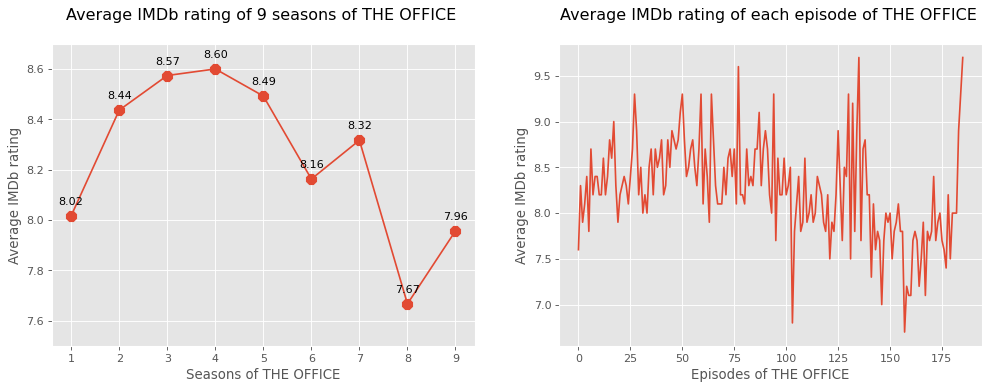

In [15]:
###### BY SEASONS % EPISODES#########
# make a shallow copy of dataset.
import copy
df = copy.copy(d)

# change the index.
df.set_index(keys=['season'], drop=False, inplace=True)
# check the how many seasons in total.
num_season = df['season'].unique().tolist()
# create a list such that the first element is the dataframe contains all details of season 1.
df_by_season=[]
for x in num_season:
   df_by_season.append(df.loc[df.season==x])

# list to store average rating for each season
avg_rating_list = []

def avg_rating (season):
    return (df_by_season[season]['imdb_rating'].mean())

for x in range(0,9):
    avg_rating_list.append(avg_rating(x))
    
# print(avg_rating_list)
fig, ax = plt.subplots(1,2,figsize=(15,5))
season = df['season'].unique()
plt.style.use("ggplot")
ax[0].plot(season, avg_rating_list, marker = "8", markersize=10)
ax[0].set_ylim(7.5,8.7)
ax[0].set_xlabel("Seasons of THE OFFICE")
ax[0].set_ylabel("Average IMDb rating")
ax[0].set_title("Average IMDb rating of 9 seasons of THE OFFICE \n ")

for x,y in zip(season,avg_rating_list):
   
    label = "{:.2f}".format(y)
    ax[0].annotate(label, # this is the text
             (x,y), # this is the point to label
             textcoords="offset points", # how to position the text
             xytext=(0,10), # distance from text to points (x,y)
             ha='center')

ax[1].plot(range(df.shape[0]), df['imdb_rating'])
ax[1].set_xlabel("Episodes of THE OFFICE")
ax[1].set_ylabel("Average IMDb rating")
ax[1].set_title("Average IMDb rating of each episode of THE OFFICE \n ")
plt.show()

Analysis about the plots:

1. From the first plot, we observed that from the first season to the forth season, the average audience rating gradually increased and peaked at the season 4. However, after season 4, the rating shows an overall downward trend, with occasional rebound in rating. In particular, the rating of the Season 8 slumped badly, hitting an all-time record low. Analysing the major changes in the eighth season, we infer that the reason for this might be the departure of the main actor Steve Carell. And after Steve Carell left, even though the rating of the final season rebounded slightly, the rating(7.96) was still far below the average rating(8.25) for the whole series.

2. From the second plot, before the episode 140, most ratings of the episode are above the 7.5, while after the episode 140, most ratings od the episode are below 8.0. The low rating interval also exactly correspond the departure of Steve Carell, consistent with the first figure. As **The Office** came to an end, the rating of the episodes increased drastically and hitted a record high in the last episode.

In general, most rating of **The Office** are above 8.0, showing it is a high-quality and popular TV shows, although its rating drop seriously as one of the main characters left. From this analysis, we can guess that the involvement of the actor Steve Carell play a significant role in audience rating performance.

### 2.2 Data Cleaning




To prepare for the modelling later, in this step we try to rule out any potential anomalous data. We mainly focus on missing values and duplicated values, since these will lead us to a biased conclusion. 

In [16]:
print("There are {} duplicated observations".format(d.duplicated().sum()))
# So we do not need to remove any data.

There are 0 duplicated observations




As the overall information of the data set shows previously, there is not any missing value. Also, according to the results above, there is no duplicated value. So we do not need to deal with the missing data and duplicated observations here.




Additional analysis:
We also plot the boxplots (did not include them here in the project for clarity and presentation purposes) for features to identify the potential outliers, and we find that the seemingly outliers mainly lay in the features: `total_votes`, `n_lines`, `n_directions`, and `n_words`. In the process of verification, we find these extreme values were all true and they were produced because of the diversity and the uncertainty of art creation, instead of recording mistakes. So we kept these extreme values and did not see them as outliers.

### 2.3 Initial Data Visualisation




#### 2.3.1 Numerical Variables



##### Fuature magnitude.

Analysing the numerical features of our data, most of them are count data. Since we know that particularly for the count data, there is quite a range of feature maginitudes present in the data, we might need to scaling the data for models. Therefore, we diaplay the feature magnitude of numerical data here for analysis.

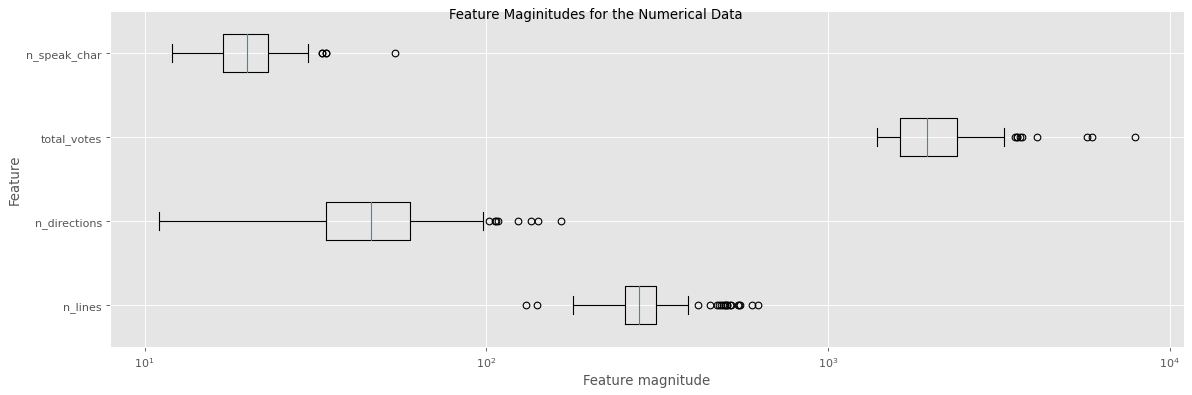

In [17]:
fig, ax = plt.subplots(figsize=(15,5))

d_num = np.array(d[["n_lines","n_directions","total_votes","n_speak_char"]])
plt.boxplot(d_num[:,:], vert=False) 
plt.xscale("symlog") 
plt.ylabel("Feature") 
plt.xlabel("Feature magnitude")

ax.set_yticklabels(["n_lines","n_directions","total_votes","n_speak_char"])

plt.suptitle("Feature Maginitudes for the Numerical Data")
plt.tight_layout()
plt.show()

From the figure, we saw that the magnitude of all the numerical features are a liitle big, especially for `n_directions`(range from 11 to 166) and `total_votes`(range from 1393 to 7934). Therefore, we need to scale all these numerical features in the further steps.                                                                                  

##### Normality

For numerical features, we select the audience rating, total votes, number of lines, number of directions, number of words and number of speaking characters to study their distribution, determining the normality of their data since normality is an important assumption for many modelling techniques.



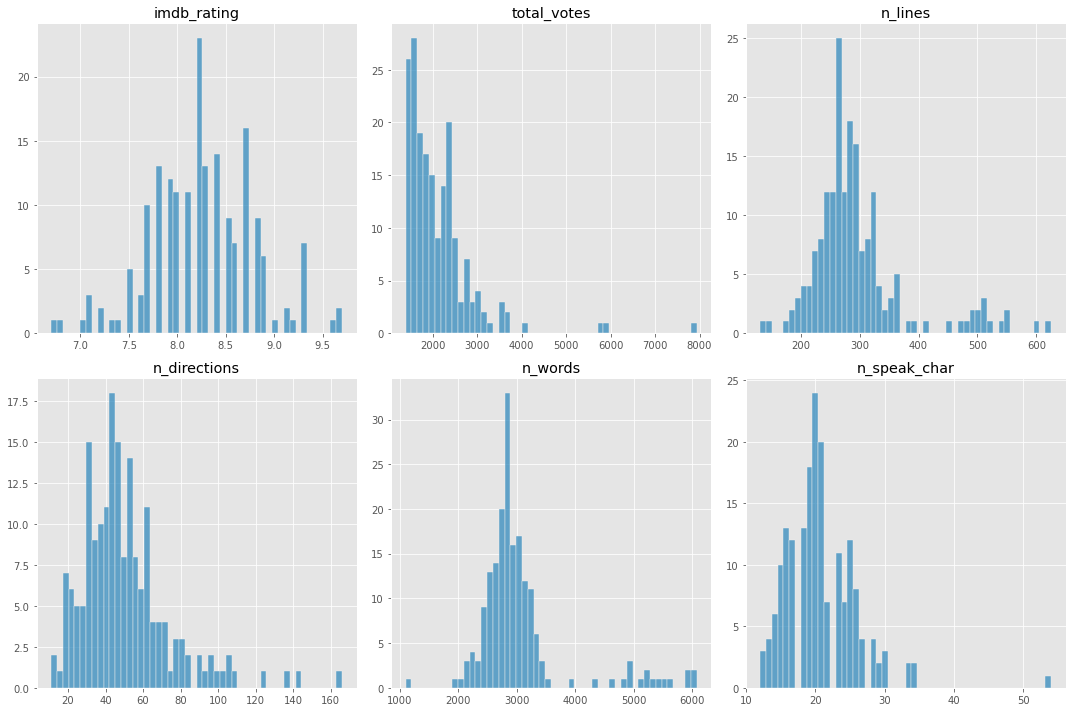

In [18]:
%matplotlib inline

# select the corresponding numerical variables to show their distributions
d1 = d[["imdb_rating","total_votes","n_lines","n_directions","n_words","n_speak_char"]]

# plot the histogram of the corresponding features
fig, axes = plt.subplots(figsize=(15,10), ncols=3, nrows=2)
axes = axes.flatten()
for i, ax in enumerate(axes):
    sns.histplot(data = d1.iloc[:,i], bins=50, ax=ax)
    ax.set_title(d1.iloc[:,i].name)
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()



From the histogram above:
1. The ratings that appeared the most were around 8.2, indicating that most of the episods are highly rated.
2. Most vote numbers are below 2500.
3. Most line numbers fell into the interval (250, 300), most direction numbers fell into the interval (40,60), most word numbers fell into the interval (2800, 3000), and most speaking-character number fell into the interval (18,22). They are all a little higher than the average level of the general American TV shows, showing its conversationality as a situational comedy

4. Most importantly, we find that `imdb_rating`, `n_lines`, `n_directions`, `n_words`, and `n_speak_char` all show a good normality. However, the distribution for `total_votes` is not bell-shaped distributions. Therefore, we select to perform a Boc-Cox transformation on it, making it from a non-normal variable to a normal shape variable, so that we are able to run a broader number of tests in the later analysis.

##### Box-Cox Transformation - 'total votes'
From the analysis above, we perform a Box-Cox Transformation on the feature —— total votes here.

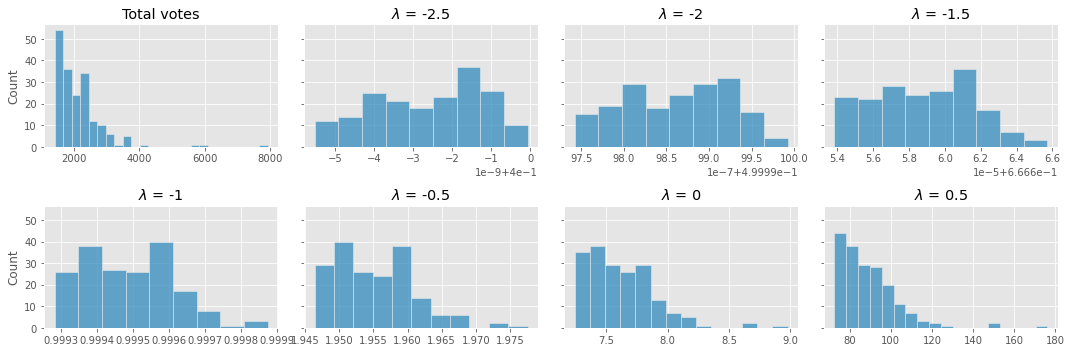

In [19]:
from scipy import stats
# extract the data of the total_votes feature
total_votes = np.array(d['total_votes'])

# set the canvas
fig, axes = plt.subplots(figsize=(15,5), ncols = 4, nrows = 2, sharey = True)
axes = axes.flatten()

# plot the histogram for the total votes
sns.histplot(data = total_votes, ax=axes[0])
axes[0].set_title("Total votes")

# set several parameters for Box-Cox Transformation and compare their performance
for i, lmbda in enumerate([-2.5,-2,-1.5,-1,-0.5,0,0.5]):
    
    # perform the Box-Cox Transformation on total votes
    vote_box_ = stats.boxcox(total_votes.astype(float), lmbda = lmbda)
    # plot the histogram of the total votes after the Box-Cox transformation
    sns.histplot(data = vote_box_, ax = axes[i+1])
    axes[i+1].set_title("$\lambda$ = {}".format(lmbda))
    
plt.tight_layout()
plt.show()



From the figures above, we observed that when scale parameter(lambda) equals to -2.5, -2, -1.5, and -1, the distribution shows a relatively good normality. But we still can not determine the best scale parameter for the Box-Cox Transformation on tital votes, so we explore further to find the best lambda in the following codes:

In [20]:
# obtain the best scale parameter 
vote_box_, bc_params = stats.boxcox(total_votes.astype(float), lmbda = None)
print("The best scale parameter is {}.".format(round(bc_params, 2)))

# rescale 'total_votes'
d['total_votes'] = vote_box_
d.head()

The best scale parameter is -1.45.


,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,main_chars
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,0.687487,2005-03-24,229,27,2757,15,Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...
1,1,2,Diversity Day,Ken Kwapis,B.J. Novak,8.3,0.687487,2005-03-29,203,20,2808,12,Angela;Dwight;Jim;Kelly;Kevin;Michael;Oscar;Pa...
2,1,3,Health Care,Ken Whittingham,Paul Lieberstein,7.9,0.687485,2005-04-05,244,21,2769,13,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
3,1,4,The Alliance,Bryan Gordon,Michael Schur,8.1,0.687485,2005-04-12,243,24,2939,14,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
4,1,5,Basketball,Greg Daniels,Greg Daniels,8.4,0.687486,2005-04-19,230,49,2437,18,Angela;Darryl;Dwight;Jim;Kevin;Michael;Oscar;P...




We obtain the best scale parameter which equals to -1.45 for the transformation and use this parameter to perform the Box-Cox Transformation. In this way, we obtain the new data set with transformed total_votes.



Since not all the features significantly influence the audience rating, we can drop some features through the data analysis, to prepare for the modelling.
We firstly use heatmap tp explore the relationship between the different features.

##### Correlation

We will use heatmap to find out if any of the features from our training set (X_train) are highly correlated



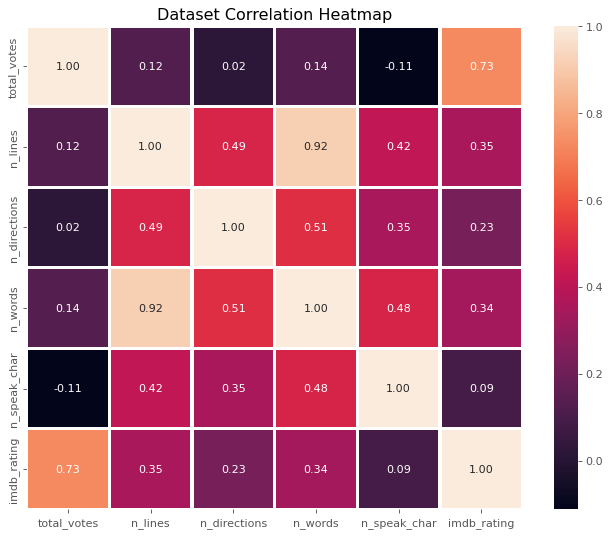

In [21]:
# plot the Heatmap of features
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(d[['total_votes','n_lines','n_directions','n_words','n_speak_char','imdb_rating']].corr(), annot=True, fmt='.2f', linewidths=2)
plt.title("Dataset Correlation Heatmap")
plt.show()



From the Heatmap above, we find that the feature `n_words` and the feature `n_lines` are highly correlated (0.92). Combining the meaning of the `n_lines`: Number of spoken lines in episode, and the meaning of the `n_words`: Number of dialog words in episide, we knew that these two variables provide very similar information, and so we can drop one of them.

Another pair with high correlation(0.73) is `imdb_rating` and total votes. Since their correlation is positive, we can infer that as the number of total votes increase, the `imdb_rating` would increase as well. This makes sense because generally speaking, people have more tend to rate a good episodes. However, since our object is advising on the creation of a special reunion of **The Office** and the total notes can not be controlled artificially, this feature can be included in our further predictive model, but might not been took into account in our final advise.




Now we need drop the features which highly correlated with other features. We select the threshold equaling to 0.8. So when their correlation of the pairs is above 0.8, one of the feature in the pairs will be dropped.

In [22]:
from feature_engine.selection import DropCorrelatedFeatures

# set  the threshold for dropping the feature
fs = DropCorrelatedFeatures(variables=None, 
                            method='pearson', 
                            threshold=0.8)

d_fs = fs.fit_transform(d)

print("Correlated Feature Groups")
display(fs.correlated_feature_sets_)

print("Dropped")
list(np.setdiff1d(list(d.columns), list(d_fs.columns)))

Correlated Feature Groups


[{'n_lines', 'n_words'}]

Dropped


['n_words']

#### 2.3.2 Categorical Variables

We will then have a look at our categorical variables: `director`, `writer`, and `main_chars`. Different directors, writers, or characters may all have impact on the episode rating and having an overview about ratings of different directors, writers, and characters will be helpful for us to make advise in creating a special reunion episode.

##### Directors
We will first look at the `director`. We can see there are 61 different directors who have directored **The Office**. If we make all the directors to dummy variables in our predictive model, our model may be overfitted. Also, there are many directors have only directed a few episodes, and the ratings for their episodes may not be very representative. So, we decide to choose to look at the 15 directors who have worked on a large number of episodes, and compute the mean of ratings for the episodes those directers participate in.

Below we have the figure of histogram showing the 15 directors and their episodes' ratings. According to the figure, we have sorted directors in descending order according to the number of episodes they have directed. We can see the director called **Randall Einhorn** have participated in the most episodes, and the episodes directed by the director called **Paul Feig** have the highest average rating.


In [23]:
print(d['director'].describe())

count                 186
unique                 61
top       Randall Einhorn
freq                   15
Name: director, dtype: object


Text(0.5, 1.0, "Directors and their episodes' ratings")

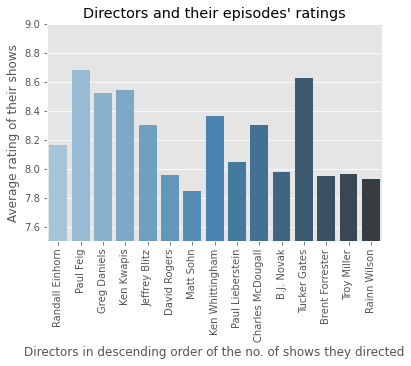

In [24]:
directors = d['director'].value_counts().head(15).keys()
# print(directors)

def dir_mean_rating (name):
    return d.loc[d['director'] == name, 'imdb_rating'].mean()

dir_rating = []
for x in directors:
  dir_rating.append(dir_mean_rating(x))

dir_df = pd.DataFrame(data={'directors':directors, 'rating':dir_rating})
dir_plot = sns.barplot(x=directors, y=dir_rating, palette="Blues_d")
dir_plot.set(ylim=(7.5,9))
dir_plot.set_xticklabels(dir_plot.get_xticklabels(), rotation=90)
plt.xlabel("Directors in descending order of the no. of shows they directed")
plt.ylabel("Average rating of their shows")
plt.title("Directors and their episodes' ratings")

##### Writers
We will then look at the `writer`. We can see there are 47 different writers who have participated in **The Office**. We can also find in some of the episodes, there are more than one writers, and we will separate them later. Similar as we previously did for `director`, if we make all the writers to dummy variables in our predictive model, our model may be overfitted. Also, there are many writers or pairs of writers have only wrote a few episodes, and the ratings for their episodes may not be very representative. So, we decide to choose to look at the 15 writers who have worked on a large number of episodes, and compute the mean of ratings for the episodes those writers participate in.

Below we have the figure of histogram showing the 15 writers and their episodes' ratings. According to the figure, we have sorted writers (or pairs of writers) in descending order according to the number of episodes they have written. We can see the writer called **Mindy Kaling** have participated in the most episodes, and the episodes written by the writer called **Greg Daniels** have the highest average rating.

In [25]:
print(d['writer'].describe()) # 47

count              186
unique              47
top       Mindy Kaling
freq                20
Name: writer, dtype: object


Text(0.5, 1.0, "Writers and their episodes' ratings")

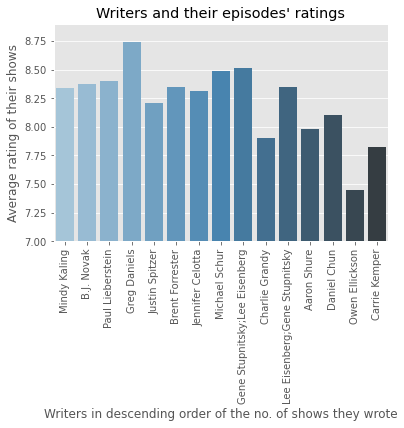

In [26]:
writers = d['writer'].value_counts().head(15).keys()
# print(writers)

def wr_mean_rating (name):
    return d.loc[d['writer'] == name, 'imdb_rating'].mean()

wr_rating = []
for x in writers:
  wr_rating.append(wr_mean_rating(x))

wr_df = pd.DataFrame(data={'writers':writers, 'rating':wr_rating})
wr_plot = sns.barplot(x=writers, y=wr_rating, palette="Blues_d")
wr_plot.set(ylim=(7,8.9))
wr_plot.set_xticklabels(wr_plot.get_xticklabels(), rotation=90)
plt.xlabel("Writers in descending order of the no. of shows they wrote")
plt.ylabel("Average rating of their shows")
plt.title("Writers and their episodes' ratings")

##### Characters
We will look at our final categorical variable `main_chars`. The characters of each episode appear as pairs, and we can see there are 186 distinct pairs of characters participating in **The Office**. As it is hard to conduct analysis on pairs, we decide to separate the pairs of characters. After separating, we can see there are unique 17 characters who have participated in **The Office**, and the character **Dwight** has taken part in most episodes. We can also see that all of the characters have appeared in a large number of episodes, which means the episodes' ratings for every chracter are representative, and we will convert all of the characters into dummy variables in our further predictive model.

In [27]:
print(d['main_chars'].describe())

count                                                   186
unique                                                  122
top       Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kelly...
freq                                                     10
Name: main_chars, dtype: object


In [28]:
d['main_chars_list'] = d['main_chars'].apply(lambda x: x.split(';') if type(x)==str else [])
chars = []
for i in d['main_chars_list']:
    chars.extend(i)

from collections import Counter
chars_counts = Counter(chars).most_common()
chars_name = np.unique(chars)
chars_name = chars_name.tolist()

chars_counts

[('Dwight', 186),
 ('Jim', 185),
 ('Pam', 182),
 ('Kevin', 180),
 ('Angela', 171),
 ('Phyllis', 165),
 ('Stanley', 165),
 ('Oscar', 164),
 ('Andy', 143),
 ('Kelly', 142),
 ('Ryan', 139),
 ('Michael', 137),
 ('Meredith', 131),
 ('Creed', 131),
 ('Toby', 108),
 ('Darryl', 105),
 ('Erin', 98)]

### 2.4 Data Preprocessing and Feature Engineering

As we have previously discussed, we want to separate pairs of writers. We use `pd.merge` function to do such procedure. As the overview of our updated data set `d_mw` shows, same `id` represents the same episode. For example, in our original data set, the writers for episode 1 appear to a pair of 3 people, but in our new data set, we separate each writer of the three into different rows.

In [29]:
df1_fs = pd.read_csv("the_office.csv", usecols=["season", "episode_name", "imdb_rating","writer"])
df2_fs = d
# df2_fs = pd.read_csv("the_office.csv")
df2_fs = df2_fs.drop('writer',axis=1)
df1_fs['id'] = df1_fs.index + 1
df2_fs['id'] = df2_fs.index + 1

df3_fs = df1_fs.set_index('id').writer.str.split(';' ,expand = True ).stack().reset_index(1,drop=True).reset_index(name='writer')
d_mw = pd.merge(df2_fs,df3_fs,on="id") 
d_mw.head(5)

,season,episode,episode_name,director,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,main_chars,main_chars_list,id,writer
0,1,1,Pilot,Ken Kwapis,7.6,0.687487,2005-03-24,229,27,2757,15,Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...,"[Angela, Dwight, Jim, Kevin, Michael, Oscar, P...",1,Ricky Gervais
1,1,1,Pilot,Ken Kwapis,7.6,0.687487,2005-03-24,229,27,2757,15,Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...,"[Angela, Dwight, Jim, Kevin, Michael, Oscar, P...",1,Stephen Merchant
2,1,1,Pilot,Ken Kwapis,7.6,0.687487,2005-03-24,229,27,2757,15,Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...,"[Angela, Dwight, Jim, Kevin, Michael, Oscar, P...",1,Greg Daniels
3,1,2,Diversity Day,Ken Kwapis,8.3,0.687487,2005-03-29,203,20,2808,12,Angela;Dwight;Jim;Kelly;Kevin;Michael;Oscar;Pa...,"[Angela, Dwight, Jim, Kelly, Kevin, Michael, O...",2,B.J. Novak
4,1,3,Health Care,Ken Whittingham,7.9,0.687485,2005-04-05,244,21,2769,13,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...,"[Angela, Dwight, Jim, Kevin, Meredith, Michael...",3,Paul Lieberstein


We have only interested in the first 15 directors and writers who have participated in the large number of episodes, so we will reconstruct our data set to make sure the updated data `d_select` only have the directors and writers we are interested in. 

For the updated data set `d_select`, the main chracters still appear as pairs, so we need to separate them as we did in the previous part. In this stage, besides separting pairs of chracters into individual ones, we also directly make dummy variables for the characters. Each name of the individual characters should be a new column of the data, and the value will be 1 if the character takes part in a given episode, 0 if the character does not appear. For example, according to the overview of our updated data set `df`, we can see the character called **Kelly** participated in the episode 2 of season 1, but did not participate in any other 3 episodes of season 1.

In [30]:
directors = d_mw['director'].value_counts().head(15).keys()
writers = d_mw['writer'].value_counts().head(15).keys()

# split 'main_chars' strings into a list for the episode with multiple characters
d_mw['char_list'] = d_mw['main_chars'].apply(lambda x: x.split(';') if type(x)==str else[])

# get unique character names and see counts for each character act in The Office
chars = []
for i in d_mw['char_list']:
    chars.extend(i)

from collections import Counter
chars_counts = Counter(chars).most_common()
chars_name = np.unique(chars)
chars_name = chars_name.tolist()

# re-construct data with only 15 directors and 15 writters we previous get in the 'directors' and 'writers' list
d_select = d_mw[d_mw['director'].isin(directors) & d_mw['writer'].isin(writers)]
d_select = d_select.reset_index(drop=True)

# separate main characters and make each main chracters into dummy variables
df = d_select.copy()
df[chars_name[1]] = [0] * df.shape[0]
for i in range(len(chars_name)):
    df[chars_name[i]] = [0] * df.shape[0]
    
for i in range(df.shape[0]):
    for char in chars_name:
        if char in df.loc[i,'main_chars']:
            df.loc[i, char] = 1

df.head()

,season,episode,episode_name,director,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,...,Kelly,Kevin,Meredith,Michael,Oscar,Pam,Phyllis,Ryan,Stanley,Toby
0,1,1,Pilot,Ken Kwapis,7.6,0.687487,2005-03-24,229,27,2757,...,0,1,0,1,1,1,1,1,1,0
1,1,2,Diversity Day,Ken Kwapis,8.3,0.687487,2005-03-29,203,20,2808,...,1,1,0,1,1,1,0,1,1,1
2,1,3,Health Care,Ken Whittingham,7.9,0.687485,2005-04-05,244,21,2769,...,0,1,1,1,1,1,0,1,1,0
3,1,5,Basketball,Greg Daniels,8.4,0.687486,2005-04-19,230,49,2437,...,0,1,0,1,1,1,1,1,1,0
4,2,1,The Dundies,Greg Daniels,8.7,0.687486,2005-09-20,256,59,2812,...,1,1,0,1,1,1,1,1,1,0


We also want to make dummy variables for the variable `director` and `writer`. For these two variables, we can easily get dummy variables using the function `pd.get_dummies`. Each of 15 directors and 15 writers will appear as a new column of the data set, and value eqauls 1 indicating the director/writer took part in the given episode, 0 indicating the director/writer did not take part in.

In [31]:
# get dummy variables
from sklearn.preprocessing import OneHotEncoder
dummy_vars = ['director','writer']
full_dummies = pd.get_dummies(df,columns=dummy_vars)
full_dummies.head()

,season,episode,episode_name,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,...,writer_Gene Stupnitsky,writer_Greg Daniels,writer_Halsted Sullivan,writer_Jennifer Celotta,writer_Justin Spitzer,writer_Lee Eisenberg,writer_Michael Schur,writer_Mindy Kaling,writer_Paul Lieberstein,writer_Warren Lieberstein
0,1,1,Pilot,7.6,0.687487,2005-03-24,229,27,2757,15,...,0,1,0,0,0,0,0,0,0,0
1,1,2,Diversity Day,8.3,0.687487,2005-03-29,203,20,2808,12,...,0,0,0,0,0,0,0,0,0,0
2,1,3,Health Care,7.9,0.687485,2005-04-05,244,21,2769,13,...,0,0,0,0,0,0,0,0,1,0
3,1,5,Basketball,8.4,0.687486,2005-04-19,230,49,2437,18,...,0,1,0,0,0,0,0,0,0,0
4,2,1,The Dundies,8.7,0.687486,2005-09-20,256,59,2812,20,...,0,0,0,0,0,0,0,1,0,0


We will then further manage our data. As we are interested in what features make the episodes popular and want to create a reunion episode. The variable `season`, `episode`, `episode_name`, `air_date` will not be useful for our predictive model as the values for these variables can not be achieved again. The variable `id` is the variable we add when dealing with original `writer` variable, so it is also not useful for our model. Additionally, since we have already had the dummy variables for all the individual characters, we will also drop the variables
`main_chars`, `char_list`, and `main_chars_list`.

After dropping those variables, we can make our model matrix and response vector. The response varaible in our model is `imdb_rating`, and the model matrix is the data set excluding the response. 

We can then split our data into two distinct sets. The first called the `training set` will contain our test data `X_train` and `y_train` which is used for determining the feature weights. The second called the `test set` will contain our testing data `X_test` and `y_test`.

In [32]:
# suppose season, episode, episode_name, air_date, id are not useful for our model construction
# as we have dummy coding main characters, drop main_chars and char_list
full_dummies_2 = full_dummies.drop(['season','episode','episode_name','n_words','air_date','id','main_chars',
                                    'char_list','main_chars_list'],axis=1)

# model matrix and response vector
X = full_dummies_2.drop('imdb_rating',axis=1) # Independet variables
y = full_dummies_2['imdb_rating'] # dependent variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

X_train.columns

Index(['total_votes', 'n_lines', 'n_directions', 'n_speak_char', 'Angela',
       'Andy', 'Creed', 'Darryl', 'Dwight', 'Erin', 'Jim', 'Kelly', 'Kevin',
       'Meredith', 'Michael', 'Oscar', 'Pam', 'Phyllis', 'Ryan', 'Stanley',
       'Toby', 'director_B.J. Novak', 'director_Brent Forrester',
       'director_Charles McDougall', 'director_David Rogers',
       'director_Greg Daniels', 'director_Harold Ramis',
       'director_Jeffrey Blitz', 'director_Ken Kwapis',
       'director_Ken Whittingham', 'director_Matt Sohn', 'director_Paul Feig',
       'director_Paul Lieberstein', 'director_Rainn Wilson',
       'director_Randall Einhorn', 'director_Tucker Gates',
       'writer_Aaron Shure', 'writer_B.J. Novak', 'writer_Brent Forrester',
       'writer_Charlie Grandy', 'writer_Daniel Chun', 'writer_Gene Stupnitsky',
       'writer_Greg Daniels', 'writer_Halsted Sullivan',
       'writer_Jennifer Celotta', 'writer_Justin Spitzer',
       'writer_Lee Eisenberg', 'writer_Michael Schur', 'wri

## 3. Model Fitting and Tuning

### 3.1	Model rejected

For this project, we first have tried standard multiple linear regression. However, it turned out that the model fitted  had $\beta$s that ranged from the smallest at -0.135 to the largest at 8.486 which is about a 80x difference in magnitude. Hence, we further explore the use of the Ridge and Lasso regression models which both penalize larger values of $\beta$s. In our case, we will stick on Ridge Regressions, a generation of linear regression model, introducing a regularisation parameter $\alpha$ which controls the relative impact of shrinkage penalty on the regression weights estimates.  

### 3.2	Ridge Regression

Ridge regression is a natural extension to linear regression which introduces an $\ell_2$ penalty on the coefficients to a standard least squares problem. Mathematically, we can express this as the following optimization problem,

$$ \underset{\boldsymbol{\beta}}{\text{argmin}} \; \lVert \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta} \rVert^2_2 + \alpha (\boldsymbol{\beta}^T\boldsymbol{\beta}) $$ 

The `Ridge` model is provided by the `linear_model` submodule and requires a single parameter `alpha` which determines the tuning parameter that adjusts the weight of the $\ell_2$ penalty.  
For this project, we will fit a Ridge Regression model with $\alpha$ equal to 10 first. To determine the model fit, we will consider the root mean square error (RMSE), which is a meansure of the models accuracy. Lower RMSE indicates better fit. Before we start, we import all the packages we need as well as two helper functions we have used in workshops.

In [33]:
# Import packages we are going to use.
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold

In [34]:
# Sources: workshop 5 - Helper functions.

# Function to get coefficients of model fitted.
def get_coefs(m):
    """Returns the model coefficients from a Scikit-learn model object as an array,
    includes the intercept if available.
    """
    
    # If pipeline, use the last step as the model
    if (isinstance(m, sklearn.pipeline.Pipeline)):
        m = m.steps[-1][1]
    
    if m.intercept_ is None:
        return m.coef_
    
    return np.concatenate([[m.intercept_], m.coef_])

# Function to evaluate the model fit.
def model_fit(m, X, y, plot = False):
    """Returns the root mean squared error of a fitted model based on provided X and y values.
    
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """
    
    y_hat = m.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_hat))
    
    res = pd.DataFrame(
        data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='y', y='y_hat', color="grey", data =  pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Fit plot")
        
        plt.subplot(122)
        sns.scatterplot(x='y', y='resid', data=res).set_title("Residual plot")
        plt.hlines(y=0, xmin=np.min(y), xmax=np.max(y), linestyles='dashed', alpha=0.3, colors="black")
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model rmse = " + str(round(rmse, 4)), fontsize=16)
        plt.show()
    
    return rmse

Before fitting the model, let's get our model matrix prepared.

In [35]:
# Define the model matrix.
X = np.c_[
    X_train.iloc[:,0:4], # numerical features: 'total_votes', 'n_lines', 'n_directions', 'n_speak_char'
    X_train.iloc[:,4:20], # 17 characters
    X_train.iloc[:,21:35], # 15 directors
    X_train.iloc[:,36:50]   # 15 writers
]

# Define model matrix for test data.
X_test_matrix = np.c_[
    X_test.iloc[:,0:4], # numerical features: 'total_votes', 'n_lines', 'n_directions', 'n_speak_char'
    X_test.iloc[:,4:20], # 17 characters
    X_test.iloc[:,21:35], # 15 directors
    X_test.iloc[:,36:50]   # 15 writers
    ]

We can notice that the values of numerical features differ a lot in magnitude. To deal with this issue, the standard approach is to center and scale all features to a common scale before fitting one of these models. Using sklearn we can perform this transformation using the `StandardScaler` transformer from the preprocessing submodule.  

[ 8.48607595e+00  2.59859157e-01  7.55253895e-02  8.05375110e-02
  2.21209930e-02  1.30223869e-02  7.14349983e-02  6.28693757e-02
 -6.80824808e-03  0.00000000e+00  7.62414431e-02  0.00000000e+00
  4.39632884e-02 -6.04273106e-02  7.80758271e-03  1.85704785e-02
 -4.16134174e-02  0.00000000e+00 -1.17117306e-02 -5.76829418e-02
  4.67652910e-02 -2.25939900e-03 -2.23840776e-02  1.00917028e-02
 -5.09973290e-03  2.79958033e-02  5.34367868e-02 -9.54239022e-03
 -2.34084144e-02 -4.28472463e-02 -3.26033849e-03  1.64105868e-02
 -3.04411688e-02 -5.53770847e-02  1.81307580e-02 -3.94899651e-02
  1.59724054e-02 -1.21174385e-02 -1.03652496e-01 -1.29587886e-04
 -1.26291783e-03 -1.54494214e-02  3.06547292e-03  1.83277133e-02
  7.80710137e-03 -1.03348823e-02  5.02224586e-02  3.21431924e-04
  2.48469456e-02]


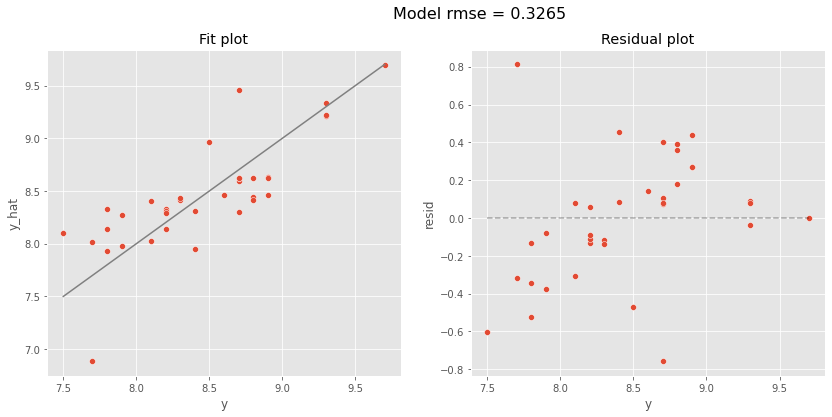

0.32650086423024516

In [36]:
r = make_pipeline(
    StandardScaler(),
    Ridge(alpha=10)
).fit(X, y_train)
print(get_coefs(r))

model_fit(r, X_test_matrix, y_test, plot=True)

The model seems to provide a reasonable good fit to our data and the residual plot does not indicate any patterns. 

### 3.3	Model refinement 

*  Tuning with GridSearchCV   
The $\alpha$ is a hyperparameter of the Ridge regression model and we can use cross validation to attempt to identify a good value for our data. In this study, we will use `GridSearchCV` to employ 5-fold cross validation to determine a good value $\alpha$.  

In [37]:
# specify a sequence of alpha values.
alphas = np.linspace(0, 60, num=200)

# Cross validation.
gs = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        Ridge()
    ),
    param_grid={'ridge__alpha': alphas},
    cv=KFold(5, shuffle=True, random_state=123),
    scoring="neg_root_mean_squared_error"
).fit(X, y_train)

To evaluate this model we can access the `best_estimator_` model object and use it to obtain an rmse for our validation data.  
According to the result, the $\alpha$ for the model with best fit is 25.0251256281407. Moreover, the resulted model RMSE is smaller than our base line model (i.e. $\alpha$=10).

{'ridge__alpha': 25.0251256281407}


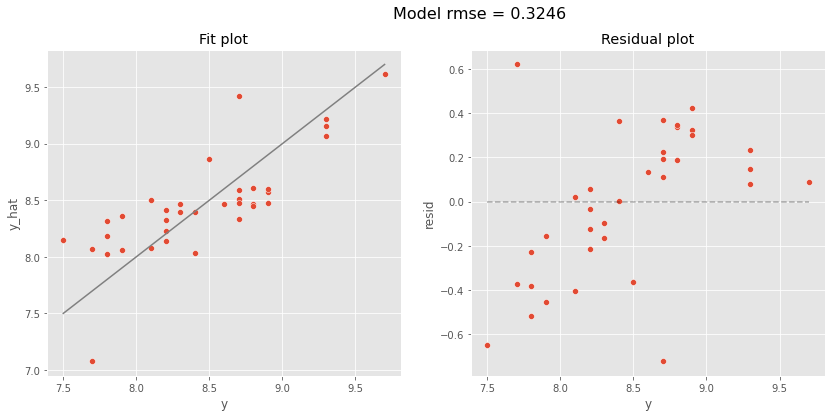

0.32455312508555517

In [38]:
print(gs.best_params_)
model_fit(gs.best_estimator_, X_test_matrix, y_test, plot=True)

In [44]:
r_best = gs.best_estimator_
# estimated parameters produced by the model.
param = get_coefs(r_best)
# parameters for all features.
full_param = np.insert(param,[5,21,35],0)
# including the 'intercept' term.
full_var = np.insert(np.array(X_train.columns),0,'intercept')
# create a dataframe containing each feature and corresponding coefficients.
res_param = {'Variables':full_var, 'Coefficients':full_param}
res = pd.DataFrame(res_param)
# Top 10 features with its coefficients.
res.sort_values(by='Coefficients',ascending=False).head(23)

,Variables,Coefficients
0,intercept,8.486076
1,total_votes,0.194513
3,n_directions,0.084741
2,n_lines,0.070002
7,Creed,0.062940
28,director_Jeffrey Blitz,0.049180
8,Darryl,0.046236
49,writer_Mindy Kaling,0.039156
21,Toby,0.036160
4,n_speak_char,0.034326


* From the results above, we observed that the intercept of the model is 8.486076, but all the coefficients for features is below 0.2. Specifically, the coefficient for `total_votes` is relative big (0.194513) compared with other coefficients, showing that when `total_votes` increase 1, the ratings would increase 0.194513. The reson for this might be that the high-quality episode usually attract more people to vote. Based on the reason, it is meaningless for us to take total votes into account since the total votes is more likely a manifestation of high ratings rather than a reason for it.


* As for the coefficients for the other variables (exclude the `total_votes` here), all of them are below 0.1, which are really slow. This indicates that the effect of the single factor is very small, and they combine to have an impact on audience rating. 


* The coefficients for all 3 numerical feature (exclude the `total_votes` here) in the model are positive, showing that as we increase the number of directions, the number of lines, and the number of speak characters, we would increase the audience rating.


* As for the categorical feature, if their coefficients are positive, their presenses will have a positive effect on the rating. However, if their coefficients are negative,their presenses will have a negative effect on the rating. According to the values of coefficients for directors, the director **Jeffrey Blitz**(0.049180) has a more positive effect on ratings than the director(`director_Harold Ramis` with 0.021813) behind him, so we should invite the director **Jeffrey Blitz** to direct the reunion, As for the writers, the writer **Mindy Kaling**(coefficient: 0.039156) and writer **Warren Lieberstein**(coefficient: 0.026291) both have positive effect on ratings, so we can choose one or both of them to be the writers for the reunion.


* According to the official information of **The Office**, the main characters are Michael Scott, Dwight Schrute, Jim Halpert, Pam Beesly, and Ryan Howard. After we output the top 25 features of importance, we can find **Creed, Darryl, Toby, Jim, Kevin, Oscar, Andy**, and **Michael** are the actors selected by the model. Comapring them with the main characters, only **Jim** and **Michael** are in the main chracters group. But from this we can not weaken the role of the main characters, since we can clearly see that after Michael, one of the character, left, the audience rating decrease to the lowest. Analysing the results about the occurance frequency of characters in episode, we find that all main characters show a really high occurance in episodes. Since there are not enough data for their absense in episodes, their low coeficients do not mean that they are less important. Therefore, for characters who should be invited to the reunion, we should keep all the main characters. If we consider inviting more characters, we should prioritize **Creed, Darryl, Toby, Kevin, Oscar** and **Andy**.

## 4. Discussion & Conclusions


#### Overview of the final model.  
Overall, the scale of estimated coefficients are quite small and differences between them are not significant, except for the intercept. The RMSE of the finel Ridge regression model in part 3 is quite small, suggesting that the model is good at predicting unoberved data.
As for features, we notice that the `total_votes` is the feature with the highest coefficient. Indeed, people tend to draw more attention to popular episodes and therefore are more likely to vote for them. However, people may care less about the episodes with lower ratings and thus fewer people will submit their votes. Furthermore, we find that the number of lines containing a stage direction, the number of the spoken lines in episode, and the number of speaking characters are positively related to the ratings. Besides, good directors and writers are also essential for highly-rated episodes. According to our fitted model, director **Jeffrey Blitz** stands out of other 14 directors and seems to produce episodes with higher ratings

#### Key features of episodes with high popularity.  
We can see from above that key features of episodes with high popularity are that they tend to be with large `n_directions` (number of lines containing a stage direction), large `n_lines` (number of spoken lines in episode) and large `n_speak_char`(number of speaking characters), as well as good `directors` and  `writers`. We have also evaluated the 10 variables with the least coeffients and figured out that the majority of them are directors. In some ways, it indicates that the director may take the main responsible for the poor ratings of some low-rated episodes. Additionally, some people believe that the huge dip during season 8 was a record low and it might be due to the fact that **Michael** (Steve Carell) who was one of the main characters left the show after 7th season.

#### Concrete recommendations on the reunion episode.  
After the analysis of parameters for the final model, we can now give advice on how to produce the highest rated reunion episode possible. Firstly, we suggest increase the number of spoken lines and the number of lines containing a stage direction as much as possible. Not only because the model suggests, but also because by doing this, we can make a tighter plot and a stronger sense of immersion for the audience. That's may be a reason why episodes with higher `n_directions` and `n_lines` lead to higher ratings. Secondly, good writers and directers are also essential for a popular episode. According to our result, we may suggest to invite **Jeffrey Blitz** as the main director, **Harold Ramis** or **Paul Lieberstein** as associate directors to produce this reunion episode. As for writers, we may prefer **Mindy Kaling** or **Warren Lieberstein**. Last but not least, characters. From the audiance's perspective, the best reunion episode should be the one that gathers all the main actors of the whole season and as well as the main supporting characters. Hence, our suggestion is to invite more characters as much as possible.